# Inventory Monitoring at Distribution Centers
This is a deep learning image classification project for identifying the number of objects in amazon bin images. The images will be classified based on the number of objects present in the bin.

In [2]:
!pip install ipywidgets
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [3]:
import os
import json
import boto3

import sagemaker
from sagemaker import get_execution_role
from sagemaker.pytorch import PyTorch


from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Data Preparation
**TODO:** Run the cell below to download the data.

The cell below creates a folder called `train_data`, downloads training data and arranges it in subfolders. Each of these subfolders contain images where the number of objects is equal to the name of the folder. For instance, all images in folder `1` has images with 1 object in them. Images are not divided into training, testing or validation sets. If you feel like the number of samples are not enough, you can always download more data (instructions for that can be found [here](https://registry.opendata.aws/amazon-bin-imagery/)). However, we are not acessing you on the accuracy of your final trained model, but how you create your machine learning engineering pipeline.

In [4]:

def download_and_arrange_data():
    with open('file_list.json', 'r') as f:
        d=json.load(f)
        # split data train =0.6, test=0.2, validation=0.2
        train = {}
        test = {}
        validation = {}
        for k, v in d.items():
            train[k], test[k] = train_test_split(d[k], test_size =0.4, random_state=0)
            test[k], validation[k] = train_test_split(test[k], test_size=0.5, random_state=0)
            
        download_images(train, 'train')
        download_images(test, 'test')
        download_images(validation, 'validation')
            
            
def download_images(files_list, data_path):
    s3_client = boto3.client('s3')
    data_path = os.path.join('bin-images', data_path)
    for k, v in files_list.items():
        print(f"Downloading Images with {k} objects to the path {data_path}")
        directory=os.path.join(data_path, k)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for file_path in tqdm(v):
            file_name=os.path.basename(file_path).split('.')[0]+'.jpg'
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', file_name),
                             os.path.join(directory, file_name))
    

#download_and_arrange_data()


In [5]:
download_and_arrange_data()

  0%|          | 1/736 [00:00<01:35,  7.68it/s]

  0%|          | 2/1379 [00:00<01:40, 13.68it/s]

  0%|          | 0/1599 [00:00<?, ?it/s]

  0%|          | 2/1423 [00:00<01:42, 13.81it/s]

  0%|          | 2/1125 [00:00<01:30, 12.41it/s]

  0%|          | 1/246 [00:00<00:24,  9.92it/s]

  0%|          | 2/460 [00:00<00:29, 15.74it/s]

  0%|          | 2/533 [00:00<00:37, 14.16it/s]

  0%|          | 2/475 [00:00<00:28, 16.67it/s]

  1%|          | 2/375 [00:00<00:28, 13.12it/s]

  0%|          | 1/246 [00:00<00:37,  6.54it/s]

  0%|          | 2/460 [00:00<00:31, 14.65it/s]

  0%|          | 0/534 [00:00<?, ?it/s]

  0%|          | 1/475 [00:00<01:06,  7.11it/s]

  0%|          | 1/375 [00:00<00:53,  7.05it/s]

100%|██████████| 375/375 [00:35<00:00, 10.70it/s]


## Dataset
**TODO:** Explain what dataset you are using for this project. Give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understanding of it. You can find more information about the data [here](https://registry.opendata.aws/amazon-bin-imagery/).

In [9]:
#TODO: Perform any data cleaning or data preprocessing

In [11]:
#TODO: Upload the data to AWS S3
#%%capture
!aws s3 cp 'bin-images' s3://myinventory-project/ --recursive

upload: bin-images/test/1/00100.jpg to s3://myinventory-project/test/1/00100.jpg     
upload: bin-images/test/1/00014.jpg to s3://myinventory-project/test/1/00014.jpg      
upload: bin-images/test/1/00901.jpg to s3://myinventory-project/test/1/00901.jpg      
upload: bin-images/test/1/00214.jpg to s3://myinventory-project/test/1/00214.jpg      
upload: bin-images/test/1/00024.jpg to s3://myinventory-project/test/1/00024.jpg      
upload: bin-images/test/1/00284.jpg to s3://myinventory-project/test/1/00284.jpg      
upload: bin-images/test/1/00229.jpg to s3://myinventory-project/test/1/00229.jpg    
upload: bin-images/test/1/00743.jpg to s3://myinventory-project/test/1/00743.jpg    
upload: bin-images/test/1/00816.jpg to s3://myinventory-project/test/1/00816.jpg    
upload: bin-images/test/1/01013.jpg to s3://myinventory-project/test/1/01013.jpg    
upload: bin-images/test/1/00525.jpg to s3://myinventory-project/test/1/00525.jpg    
upload: bin-images/test/1/01006.jpg to s3://myinventor

In [4]:
role =  get_execution_role()

## Model Training
**TODO:** This is the part where you can train a model. The type or architecture of the model you use is not important. 

**Note:** You will need to use the `train.py` script to train your model.

In [5]:
#TODO: Declare your model training hyperparameter.
#NOTE: You do not need to do hyperparameter tuning. You can use fixed hyperparameter values

hyperparameters = {
    'lr':0.001,
    'batch-size':128,
    'epochs':10,
    'test-batch-size':100
}
hyperparameters

{'lr': 0.001, 'batch-size': 128, 'epochs': 10, 'test-batch-size': 100}

In [6]:
#TODO: Create your training estimator
estimator = PyTorch(
    entry_point="train.py",
    base_job_name='image-classification-training',
    role=role,
    framework_version="1.4.0",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    py_version='py3',
    output_path = "s3://myinventory-project/output/",
    hyperparameters=hyperparameters
)



In [15]:
# TODO: Fit your estimator

estimator.fit({"train": "s3://myinventory-project/train/",
              "test":"s3://myinventory-project/test/",
              "val":"s3://myinventory-project/validation/"}, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: image-classification-training-2023-03-23-06-50-15-887


2023-03-23 06:50:25 Starting - Starting the training job......
2023-03-23 06:51:05 Starting - Preparing the instances for training......
2023-03-23 06:52:05 Downloading - Downloading input data...
2023-03-23 06:52:38 Training - Downloading the training image......
2023-03-23 06:53:44 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-23 06:53:55,726 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2023-03-23 06:53:55,753 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-03-23 06:53:55,755 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-03-23 06:53:55,933 sagemaker-containers INFO     Module default_user_module_name does not provide a setup.py. 
Generating setup.py
2023-03-23 06:53:55,933 sagemaker-containers INFO     Generating setup.cfg
2

In [7]:
#loading the model
from sagemaker.pytorch import PyTorch
estimator = PyTorch.attach("image-classification-training-2023-03-23-06-50-15-887")


2023-03-23 06:55:55 Starting - Preparing the instances for training
2023-03-23 06:55:55 Downloading - Downloading input data
2023-03-23 06:55:55 Training - Training image download completed. Training in progress.
2023-03-23 06:55:55 Uploading - Uploading generated training model
2023-03-23 06:55:55 Completed - Training job completed


## Standout Suggestions
You do not need to perform the tasks below to finish your project. However, you can attempt these tasks to turn your project into a more advanced portfolio piece.

### Hyperparameter Tuning
**TODO:** Here you can perform hyperparameter tuning to increase the performance of your model. You are encouraged to 
- tune as many hyperparameters as you can to get the best performance from your model
- explain why you chose to tune those particular hyperparameters and the ranges.


In [17]:
#TODO: Create your hyperparameter search space
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

hyperparameter_ranges = {
    'epochs': IntegerParameter(32, 128),
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]),
}


objective_metric_name = "Average Test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Average Test loss", "Regex": "Average Test loss: ([0-9\\.]+)"}]
#Test Loss



In [18]:
#TODO: Create your training estimator

estimator = PyTorch(
    entry_point="hpo.py",
    base_job_name='inventory-classification-tuner',
    role=role,
    framework_version="1.4.0",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    py_version='py3',
    output_path = "s3://myinventory-project/hpo-output/",
    hyperparameters=hyperparameters
)


In [19]:
# TODO: Find the best hyperparameters

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,  # you once have one ml.g4dn.xlarge instance available
    objective_type=objective_type
)


In [20]:
# Fit estimator

tuner.fit({"train": "s3://myinventory-project/train/",
              "test":"s3://myinventory-project/test/",
              "val":"s3://myinventory-project/validation/"}, wait=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


..............................................................!


In [8]:
from sagemaker.tuner import HyperparameterTuner
tuner = HyperparameterTuner.attach("pytorch-training-230323-1021")

In [9]:
# #loading the model
# from sagemaker.pytorch import PyTorch
# estimator = PyTorch.attach("inventory-classification-tuner-2023-03-20-17-21-05-770")


2023-03-20 17:30:49 Starting - Preparing the instances for training
2023-03-20 17:30:49 Downloading - Downloading input data
2023-03-20 17:30:49 Training - Training image download completed. Training in progress.
2023-03-20 17:30:49 Uploading - Uploading generated training model
2023-03-20 17:30:49 Completed - Training job completed


In [22]:
tuner.best_estimator

<bound method HyperparameterTuner.best_estimator of <sagemaker.tuner.HyperparameterTuner object at 0x7f6c34f51750>>

In [23]:
best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_hyperparameters = best_estimator.hyperparameters()
best_hyperparameters


2023-03-23 10:26:13 Starting - Preparing the instances for training
2023-03-23 10:26:13 Downloading - Downloading input data
2023-03-23 10:26:13 Training - Training image download completed. Training in progress.
2023-03-23 10:26:13 Uploading - Uploading generated training model
2023-03-23 10:26:13 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"Average Test loss"',
 'batch-size': '"32"',
 'epochs': '77',
 'lr': '0.09886747439639956',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"inventory-classification-tuner-2023-03-23-10-21-11-201"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://myinventory-project/inventory-classification-tuner-2023-03-23-10-21-11-201/source/sourcedir.tar.gz"',
 'test-batch-size': '100'}

### Model Profiling and Debugging
**TODO:** Use model debugging and profiling to better monitor and debug your model training job.

In [24]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, DebuggerHookConfig, rule_configs, CollectionConfig
from sagemaker.debugger import ProfilerRule, ProfilerConfig, FrameworkProfile


rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
]


hook_config = DebuggerHookConfig(
    hook_parameters={
        "train.save_interval": "10",
        "eval.save_interval": "5"},
    collection_configs = [CollectionConfig(name = "CrossEntropyLoss_output_0",
                                          parameters = {
                                          "include_regex": "CrossEntropyLoss_output_0",
                                          "train.save_interval": "10",
                                          "eval.save_interval": "1"})]
)

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)


In [25]:
hyperparameters = {"test-batch-size": "100",
    "batch-size": int(best_hyperparameters['batch-size'].replace('"', '')), \
                   "lr": best_hyperparameters['lr']}
hyperparameters

{'test-batch-size': '100', 'batch-size': 32, 'lr': '0.09886747439639956'}

In [26]:
# TODO: Create and fit an estimator


#adjust this cell to accomplish multi-instance training
estimator = PyTorch(
    entry_point='train.py',
    base_job_name='inventory-classification-tuner',
    role=role,
    instance_count=1,
    instance_type='ml.g4dn.xlarge',
    framework_version='1.4.0',
    py_version='py3',
    hyperparameters=hyperparameters,
    ## Debugger and Profiler parameters
    rules = rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
    output_path = "s3://myinventory-project/output-best/",
)

In [27]:
# TODO: Fit your estimator
estimator.fit({"train": "s3://myinventory-project/train/",
              "test":"s3://myinventory-project/test/",
              "val":"s3://myinventory-project/validation/"}, wait=True)


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: inventory-classification-tuner-2023-03-23-10-36-30-696


2023-03-23 10:36:32 Starting - Starting the training job...
2023-03-23 10:37:04 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
ProfilerReport: InProgress
LowGPUUtilization: InProgress
...
2023-03-23 10:37:37 Downloading - Downloading input data......
2023-03-23 10:38:25 Training - Downloading the training image......
2023-03-23 10:39:25 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-23 10:39:33,962 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2023-03-23 10:39:33,991 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-03-23 10:39:33,993 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-03-23 10:39:

In [21]:
#loading the model
from sagemaker.pytorch import PyTorch
#estimator = PyTorch.attach("inventory-classification-tuner-2023-03-20-19-02-33-580")
estimator = PyTorch.attach("inventory-classification-tuner-2023-03-21-08-01-01-856")
#inventory-classification-tuner-2023-03-23-10-36-30-696



2023-03-20 19:16:35 Starting - Preparing the instances for training
2023-03-20 19:16:35 Downloading - Downloading input data
2023-03-20 19:16:35 Training - Training image download completed. Training in progress.
2023-03-20 19:16:35 Uploading - Uploading generated training model
2023-03-20 19:16:35 Completed - Training job completed


In [28]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

print(job_name)

inventory-classification-tuner-2023-03-23-10-36-30-696


In [29]:
# TODO: Plot a debugging output.

job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

print(job_name)

inventory-classification-tuner-2023-03-23-10-36-30-696


**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [30]:
# TODO: Display the profiler output

print(f"Jobname: {job_name}")
print(f"Client: {client}")
print(f"Description: {description}")

Jobname: inventory-classification-tuner-2023-03-23-10-36-30-696
Client: <botocore.client.SageMaker object at 0x7f6c3319ded0>
Description: {'TrainingJobName': 'inventory-classification-tuner-2023-03-23-10-36-30-696', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:567514953852:training-job/inventory-classification-tuner-2023-03-23-10-36-30-696', 'ModelArtifacts': {'S3ModelArtifacts': 's3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/output/model.tar.gz'}, 'TrainingJobStatus': 'Completed', 'SecondaryStatus': 'Completed', 'HyperParameters': {'batch-size': '32', 'lr': '"0.09886747439639956"', 'sagemaker_container_log_level': '20', 'sagemaker_job_name': '"inventory-classification-tuner-2023-03-23-10-36-30-696"', 'sagemaker_program': '"train.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://myinventory-project/inventory-classification-tuner-2023-03-23-10-36-30-696/source/sourcedir.tar.gz"', 'test-batch-size': '"100"'}, 'Al

In [31]:
debug_output_path = estimator.latest_job_debugger_artifacts_path()
print(debug_output_path)

s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/debug-output


In [32]:
debug_output_path = estimator.latest_job_debugger_artifacts_path()



from smdebug.trials import create_trial
trial = create_trial(debug_output_path)

[2023-03-23 10:58:10.547 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-23 10:58:10.562 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/debug-output


In [33]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2023-03-23 10:58:14.166 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/debug-output


In [34]:
trial.tensor_names() #list all the tensor names

[2023-03-23 10:58:17.193 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-03-23 10:58:18.212 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.rel

In [35]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

20

In [36]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

66

In [37]:
#Defining some utility functions to be used for plotting tensors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

#utility function to get data from tensors
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

#plot tensor utility functions for plotting tensors
def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("Completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("Completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)
    plt.show()

loaded TRAIN data
loaded EVAL data
Completed TRAIN plot
Completed EVAL plot


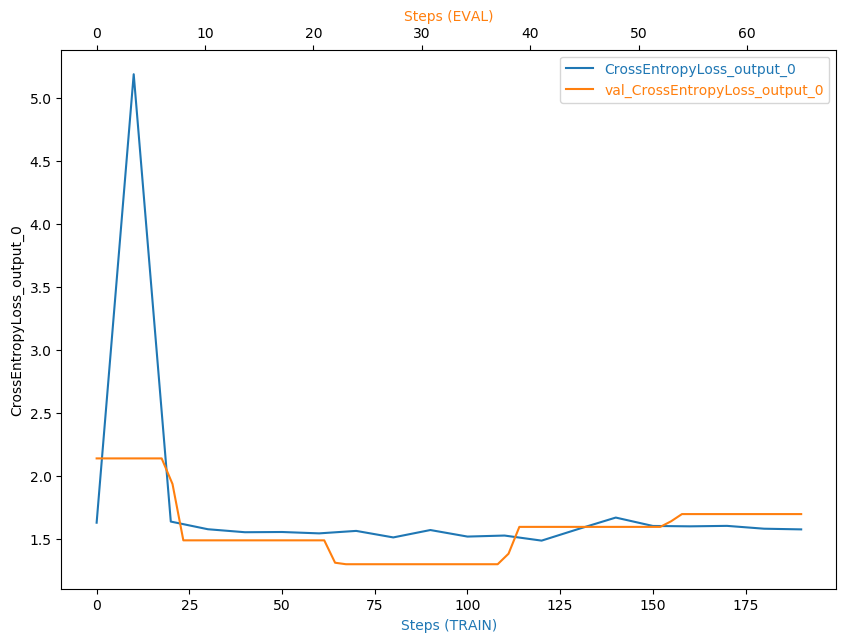

In [38]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

In [39]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"Profiler report location: {rule_output_path}")


Profiler report location: s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output


In [40]:
! aws s3 ls {rule_output_path} --recursive

2023-03-23 10:41:33     335922 output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-03-23 10:41:33     178314 output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-03-23 10:41:29        191 output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-03-23 10:41:30       3833 output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-03-23 10:41:30        126 output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-03-23 10:41:30        129 output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-r

In [41]:
! aws s3 cp {rule_output_path} ./ --recursive  

download: s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json to ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json
download: s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://myinventory-proje

In [42]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [59]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

In [43]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge') # TODO: Add your deployment configuration like instance type and number of instances



INFO:sagemaker:Creating model with name: inventory-classification-tuner-2023-03-23-10-59-30-255
INFO:sagemaker:Creating endpoint-config with name inventory-classification-tuner-2023-03-23-10-59-30-255
INFO:sagemaker:Creating endpoint with name inventory-classification-tuner-2023-03-23-10-59-30-255


----!

### Model Deploying and Querying
**TODO:** Can you deploy your model to an endpoint and then query that endpoint to get a result?

In [35]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge') # TODO: Add your deployment configuration like instance type and number of instances



INFO:sagemaker:Creating model with name: inventory-classification-tuner-2023-03-21-08-29-16-897
INFO:sagemaker:Creating endpoint-config with name inventory-classification-tuner-2023-03-21-08-29-16-897
INFO:sagemaker:Creating endpoint with name inventory-classification-tuner-2023-03-21-08-29-16-897


----!

In [44]:
from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor

model_location = estimator.output_path + estimator.latest_training_job.job_name + "/output/model.tar.gz"
#model_location=estimator.model_data
print (model_location)

#print(model_location)

s3://myinventory-project/output-best/inventory-classification-tuner-2023-03-23-10-36-30-696/output/model.tar.gz


In [45]:
#We need to define the serializer and deserializer that we will be using as default for our Prediction purposes
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()

In [46]:
#If we need to override the serializer and deserializer then we need to pass them in an class inheriting the Predictor class and pass this class as parameter to our PyTorchModel
class ImgPredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImgPredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )

In [47]:
pytorch_model = PyTorchModel( model_data = model_location,
                            role = role,
                             entry_point= "inference.py",
                             py_version = "py3",
                             framework_version = "1.6",
                            predictor_cls = ImgPredictor
                            )

In [48]:
predictor = pytorch_model.deploy( initial_instance_count = 1, instance_type = "ml.t2.medium") #Using ml.t2.medium to save costs

INFO:sagemaker:Creating model with name: pytorch-inference-2023-03-23-11-04-43-293
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-03-23-11-04-44-032
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-03-23-11-04-44-032


-------------!

In [52]:
from PIL import Image
import io

def image_to_byte_array(image:Image):
    imgByteArr = io.BytesIO()
    image.save(imgByteArr, format=image.format)
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

img = Image.open("tests/00150.jpg", mode='r')
img_bytes = image_to_byte_array(img)
type(img_bytes)

bytes

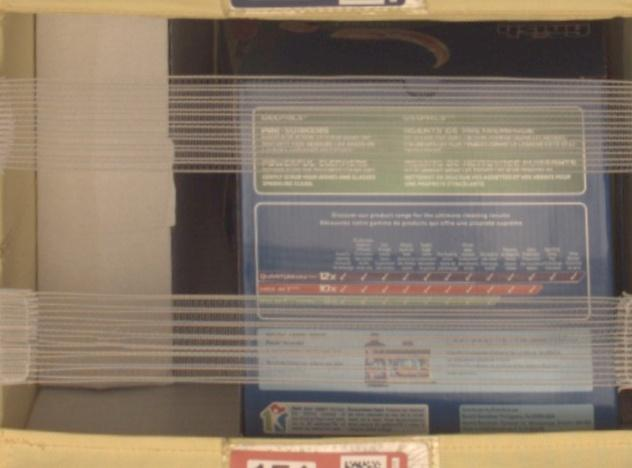

In [53]:
from PIL import Image
import io
Image.open(io.BytesIO(img_bytes))

In [54]:
response = predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

In [55]:
response

[[-0.44875672459602356,
  0.20184704661369324,
  0.3914235234260559,
  0.09492100775241852,
  -0.006683466490358114]]

In [56]:
import numpy as np
arg_max = np.argmax(response, 1)
arg_max

array([2])

In [57]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2023-03-23-11-04-44-032
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2023-03-23-11-04-44-032


### Cheaper Training and Cost Analysis
**TODO:** Can you perform a cost analysis of your system and then use spot instances to lessen your model training cost?

### Multi-Instance Training
**TODO:** Can you train your model on multiple instances?

In [58]:
# TODO: Train your model on Multiple Instances

multi_instance = PyTorch(
    base_job_name="Multi-instance-class-job",
    entry_point="train.py",
    role=role,
    framework_version="1.4.0",
    py_version="py3",
    instance_count=2,
    instance_type="ml.g4dn.xlarge",
    hyperparameters=hyperparameters,
    rules = rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)
multi_instance.fit({"train": "s3://myinventory-project/train/",
              "test":"s3://myinventory-project/test/",
              "val":"s3://myinventory-project/validation/"}, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: Multi-instance-class-job-2023-03-23-11-18-39-463


2023-03-23 11:18:41 Starting - Starting the training job...
2023-03-23 11:19:14 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
ProfilerReport: InProgress
LowGPUUtilization: InProgress
...
2023-03-23 11:19:50 Downloading - Downloading input data......
2023-03-23 11:20:46 Training - Downloading the training image......
2023-03-23 11:21:46 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-23 11:21:46,447 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2023-03-23 11:21:46,474 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-